In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [3]:
# Loading the dataset
df = pd.read_csv("complaints.csv")

/var/folders/3n/y6l_g9s960lc_759jvhdhxp40000gn/T/ipykernel_99912/1533116171.py:2: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("complaints.csv")


### Initial Investigation for the dataset that we have selected. 

First, we are trying to figure out the structure of the data. Seeing how the dataset looks like and what attributes it has. 
Just by looking at the attributes and our end goal, we can determine which of these attributes we can actually use (be beneficial to us)

In [4]:
df.shape

(3041367, 18)

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041367 entries, 0 to 3041366
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 417.

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-10-29,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,CA,90806.0,"Older American, Servicemember",NaN,Postal mail,2022-10-29,Closed with explanation,Yes,NaN,6142344
1,2022-10-18,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,AMERICAN EXPRESS COMPANY,GA,30294.0,NaN,NaN,Web,2022-10-18,Closed with non-monetary relief,Yes,NaN,6100149
2,2022-10-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,TX,76180.0,NaN,NaN,Web,2022-10-22,In progress,Yes,NaN,6117096
3,2022-10-15,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"Frontline Asset Strategies, LLC",TX,77379.0,NaN,NaN,Web,2022-10-15,Closed with explanation,Yes,NaN,6089209
4,2022-10-21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NY,11738.0,NaN,Consent not provided,Web,2022-10-21,Closed with non-monetary relief,Yes,NaN,6114465


Here, we try to determine the unique values and null values to determine if the dataset has enough representative data for our goal

In [6]:
# Printing the counts of each column (unique and null vals.)
for col in df.select_dtypes(['object']).columns:
    print('Col:', col,'; Num. unique :',df[col].nunique(),'; Num. NaN :',df[col].isna().sum())

Col: Date received ; Num. unique : 3987 ; Num. NaN : 0
Col: Product ; Num. unique : 18 ; Num. NaN : 0
Col: Sub-product ; Num. unique : 76 ; Num. NaN : 235294
Col: Issue ; Num. unique : 165 ; Num. NaN : 0
Col: Sub-issue ; Num. unique : 221 ; Num. NaN : 680512
Col: Consumer complaint narrative ; Num. unique : 954855 ; Num. NaN : 1949880
Col: Company public response ; Num. unique : 11 ; Num. NaN : 1722836
Col: Company ; Num. unique : 6546 ; Num. NaN : 0
Col: State ; Num. unique : 63 ; Num. NaN : 39969
Col: ZIP code ; Num. unique : 60216 ; Num. NaN : 40376
Col: Tags ; Num. unique : 3 ; Num. NaN : 2694899
Col: Consumer consent provided? ; Num. unique : 4 ; Num. NaN : 811322
Col: Submitted via ; Num. unique : 7 ; Num. NaN : 0
Col: Date sent to company ; Num. unique : 3936 ; Num. NaN : 0
Col: Company response to consumer ; Num. unique : 8 ; Num. NaN : 4
Col: Timely response? ; Num. unique : 2 ; Num. NaN : 0
Col: Consumer disputed? ; Num. unique : 2 ; Num. NaN : 2272921


In [29]:
df["Product"].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    1384104
Debt collection                                                                  449194
Mortgage                                                                         363922
Credit card or prepaid card                                                      162683
Credit reporting                                                                 140430
Checking or savings account                                                      139347
Credit card                                                                       89190
Bank account or service                                                           86206
Student loan                                                                      70781
Money transfer, virtual currency, or money service                                46736
Vehicle loan or lease                                                             36543
Consumer Loan                   

Similar to above, we try to see if the type of complaints are not saturated around one few types of products. This graph shows us that the complaints, although mostly around Credit reporting, credit repair services and other personal consumer reports, are decent enough to be representative of complaints.

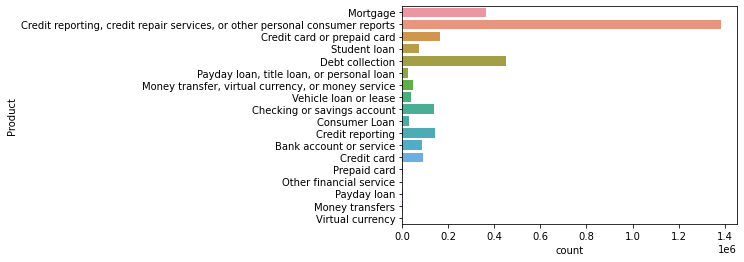

In [30]:
# Plotting the countplot for the product determining the categeory and their counts
sb.countplot(data=df, y = "Product")
plt.show()

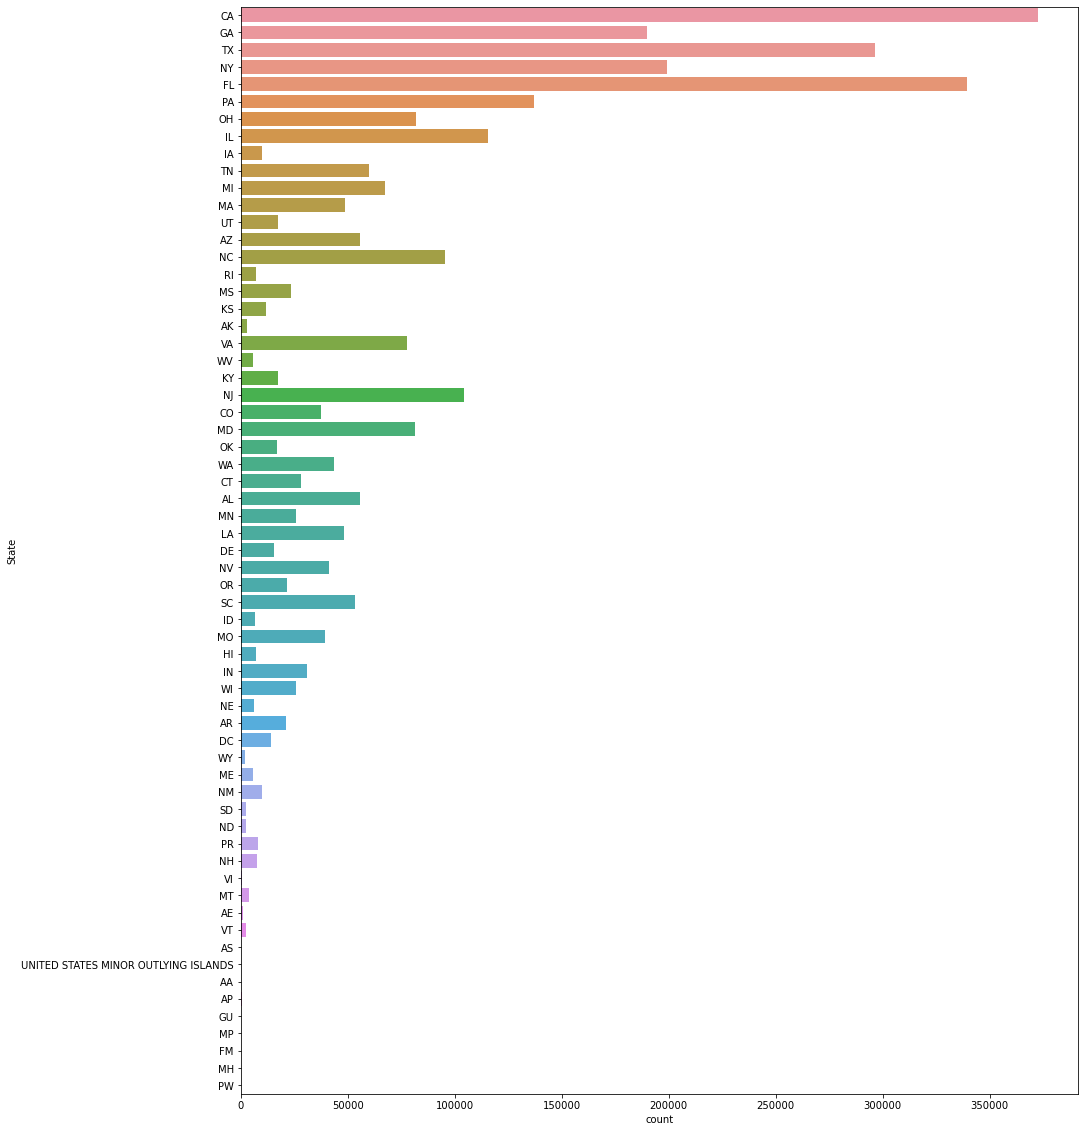

In [59]:
# Plotting the countplot for Submitted via
plt.figure(figsize=(15,20))
ax = sb.countplot(data=df, y = "State")
#plt.figure(figsize=(15,20))
plt.show()


<AxesSubplot:>

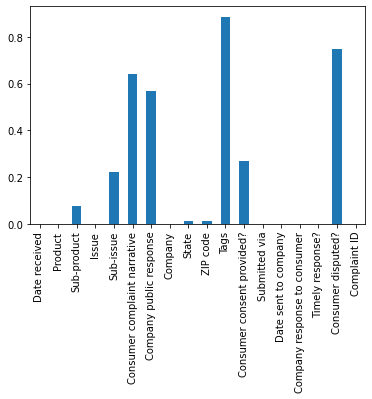

In [58]:
# We can seee that there is a high percentage of null values
df.isnull().mean(0).plot.bar()

Here, we try to reduce the number of attributes, dropping off the ones that are irrelevant to our work. Below is the updated data.

In [31]:
# Keeping the relevant attributes from the dataset
df_less = df[['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State','Submitted via', 'Company response to consumer', 'Consumer disputed?']]
df_less.shape
df_less.head()


,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Submitted via,Company response to consumer,Consumer disputed?
0,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,CA,Postal mail,Closed with explanation,NaN
1,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,AMERICAN EXPRESS COMPANY,GA,Web,Closed with non-monetary relief,NaN
2,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,TX,Web,In progress,NaN
3,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"Frontline Asset Strategies, LLC",TX,Web,Closed with explanation,NaN
4,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NY,Web,Closed with non-monetary relief,NaN


Here, we will calculate the percentage of data that actually has text in the 'Consumer complaint narrative'. This will tell us how much of the data is actually meaningful to us. 

We see that around 35.9 percentage of data is meaningful to us out of the entire dataset. Considering that the data has 3041367 lines, 35.9% is approx. 1091850.753 which is still significantly meaningful to our work. Since we are performing text analysis, we should be able to work on this dataset.

In [32]:
# Since we are doing text analysis using mostly the consumer complaint narrative, we will drop the rows where val. for narrative is NaN
df_less['Consumer complaint narrative'].notnull().sum() / len(df) * 100

35.88803981893668

Here, we get rid of the data that has none (NaN) in the 'Consumer complaint narrative'. This will make our process more efficeient as we don't have to go through the redundant data. Number of lines was reduced from 3041367 to 1091487. 

In [33]:
df_less_1 = df_less[pd.notnull(df_less['Consumer complaint narrative'])]
df_less_1.shape


(1091487, 11)

In [34]:
df_less_1.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Submitted via,Company response to consumer,Consumer disputed?
5,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Card was charged for something you did not pur...,my original credit card with universal card ac...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",GA,Web,Closed with monetary relief,NaN
15,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,"Hello, In XXXX, my Macy 's credit card was clo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",MA,Web,Closed with monetary relief,NaN
18,Vehicle loan or lease,Loan,Struggling to pay your loan,Lender trying to repossess or disable the vehicle,On XX/XX/XXXX I was taken out of work due to a...,Company believes it acted appropriately as aut...,Automotive Partners Funding,AZ,Web,Closed with explanation,NaN
48,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,Hey all items been paid and full but still sho...,Company has responded to the consumer and the ...,"I.C. System, Inc.",TX,Web,Closed with explanation,NaN
53,Mortgage,Conventional home mortgage,Closing on a mortgage,NaN,As the executor of my mother 's estate I sold ...,Company believes it acted appropriately as aut...,"SELECT PORTFOLIO SERVICING, INC.",MD,Web,Closed with explanation,NaN


In [35]:
df_less_1['Consumer complaint narrative'].notnull().sum() / len(df) * 100

35.88803981893668

In [47]:
df_less_1.describe()


,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Submitted via,Company response to consumer,Consumer disputed?
count,1091487,1039279,1091487,898504,1091487,542191,1091487,1086890,1091487,1091485,164060
unique,18,75,160,216,954855,11,5477,63,1,6,2
top,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,My credit reports are inaccurate. These inaccu...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,Web,Closed with explanation,No
freq,499697,491626,243425,127509,1599,446223,163078,136235,1091487,875979,128253


In [51]:
# Determining the missing values
df_less_1.isnull().sum(0)

Product                              0
Sub-product                      52208
Issue                                0
Sub-issue                       192983
Consumer complaint narrative         0
Company public response         549296
Company                              0
State                             4597
Submitted via                        0
Company response to consumer         2
Consumer disputed?              927427
dtype: int64

#### Patterns

One of the pattern that I see for this is a lot of attributes for the data have missing values. As seen below from the percentage bar plot. 

<AxesSubplot:>

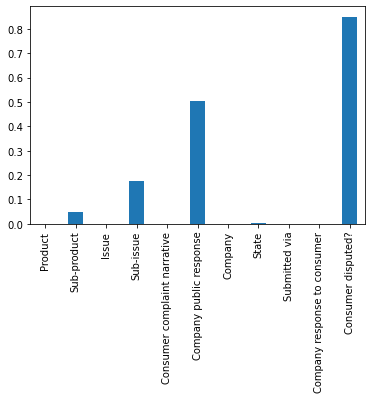

In [57]:
# Determining the missing values (percentage)
df_less_1.isnull().mean(0).plot.bar()


#### Challenges

One of the challenges that I see that can occue in the future is that since certain attributes have missing values, certain Machine Learning algorithms do not accept missing values. We can see that certain attributes like 'Consumer disputed?' has a huge percentage of missing vlaues. So even if we try to fill in the missing values with something, it would result in inaccurate data. 